# Support Vector Machine On Digits and Faces data

### Initializing needed libraries 

In [4]:
import numpy as np
from matplotlib import pyplot
import sys
import numpy as np
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import gc
import cv2

### Reading Datasets 

In [5]:
def loadLabelsFile(filename, n):
  """
  Reads n labels from a file and returns a list of integers.
  """
  labels = []

  with open(filename, 'r', encoding='utf-8') as file:
    for line in file:
      if line == '':
          break
      labels.append(int(line))
  return labels

In [6]:
#Each digit is 28x28 pixels, and each face/non-face image is 60x74 , this is an error data is 60x70 not 74
def digit_train():
    train_digits_X = []

    with open('./digitdata/trainingimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char == ' ':
                    l.append(int(0))
                elif char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]


    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/traininglabels", 5000)

    return train_digits_X,train_digits_Y


def digit_test():
    train_digits_X = []

    with open('./digitdata/testimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))

            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/testlabels", 1000)


    return train_digits_X,train_digits_Y



def digit_valid():
    train_digits_X = []

    with open('./digitdata/validationimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/validationlabels", 1000)
    return train_digits_X , train_digits_Y




def face_train():
    train_digits_X = []

    with open('./facedata/facedatatrain', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatatrainlabels", 451)


    return train_digits_X , train_digits_Y



def face_valid():
    train_digits_X = []

    with open('./facedata/facedatavalidation', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatavalidationlabels", 301)
    return train_digits_X , train_digits_Y




def face_test():
    train_digits_X = []

    with open('./facedata/facedatatest', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatatestlabels", 150)
    return train_digits_X , train_digits_Y

#451 60 70

### Function to visualizes first 9 samples of each dataset

In [7]:
from matplotlib import pyplot as plt

def visualize(t_x):
    #visualize first 9 instances of dataset
    for i in range(9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(t_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()


#Each digit is 28x28 pixels, and each face/non-face image is 60x74 , this is an error data is 60x70 not 74


### SVM with different Kernels and Cost Factors

In [56]:
def SVM(t_x,t_y,cv_x,cv_y,tst_x,tst_y) :    
    flat_t_x = t_x.reshape(t_x.shape[0],t_x.shape[1]*t_x.shape[2])
    flat_cv_x = cv_x.reshape(cv_x.shape[0],cv_x.shape[1]*cv_x.shape[2])
    flat_tst_x = tst_x.reshape(tst_x.shape[0],tst_x.shape[1]*tst_x.shape[2])   
    
    #List to store accuracy scores in
    SVM_Scores = []
    
    # an initial SVM model with rbf kernel and different values for c (Regularization parameter)
    for i in [0.01, 0.1, 1, 10, 100, 1000]: 
        svm_c = SVC(kernel='poly',C=i, degree =2)
        svm_c.fit(flat_t_x ,t_y)
        SVM_Scores.append(svm_c.score(flat_cv_x,cv_y))
        
    highest_SVM = SVM_Scores.index(max(SVM_Scores))
    
    svm_c = SVC(kernel='rbf',C=highest_SVM)
    svm_c.fit(flat_t_x,t_y)
    test_score = svm_c.score(flat_tst_x,tst_y)
    return  SVM_Scores, test_score
    
   # predictions = svm_linear.predict(flat_tst_x)   
   #confusion = metrics.confusion_matrix(y_true = tst_y, y_pred = predictions)   
   #accuracyScore = metrics.accuracy_score(y_true=tst_y, y_pred=predictions)
   #return accuracyScore


In [57]:
def results(face_or_digit) :

    if(face_or_digit=="digit"):
        tr_x, tr_y = digit_train()
        cv_x, cv_y = digit_valid()
        tst_x, tst_y = digit_test()
    else :
        tr_x, tr_y = face_train()
        cv_x, cv_y = face_valid()
        tst_x, tst_y = face_test()
        
    # fit
    #score_digit= SVM(tr_x, tr_y,cv_x,cv_y,tst_x,tst_y)
    #print(score_digit*100, '%')
    
    score_digit, tst_score_digit = SVM(tr_x, tr_y, cv_x, cv_y, tst_x, tst_y)
    highest_SVM = score_digit.index(max(score_digit)) 
    
    plt.figure(figsize=(10, 6))
    x = [0.01, 0.1, 1, 10, 100, 1000]
    plt.plot(range(len(x)), score_digit, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='purple', markersize=10)
    plt.xticks(range(len(x)), x)
    plt.title(f'Score vs. cost factor(s) for {face_or_digit}')
    plt.xlabel('C')
    plt.ylabel('Score')
    print(f"Maximum score for {face_or_digit} : ", score_digit[highest_SVM]*100, "at c", x[highest_SVM])

    plt.show()

    print(f"Training accuracy for {face_or_digit}: ", tst_score_digit * 100, '%')
    

digit sample data


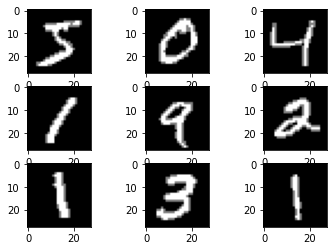

Maximum score for digit :  89.1
Training accuracy for digit:  92.10000000000001 %


In [58]:
print("digit sample data")
visualize(digit_train()[0])
results("digit")

Face sample data


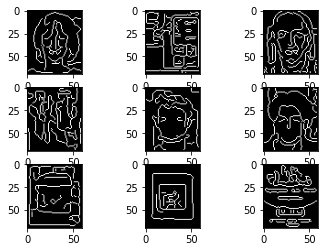

Maximum score for face :  91.0299003322259
Training accuracy for face:  90.0 %


In [59]:
print("Face sample data")
visualize(face_train()[0])
results("face")

In [83]:
gc.collect()

3097